#<center> **BA476: FINAL PROJECT**
##<center> **Project Title: Predicting College Prospect Performance in the NBA**

###<center> Team members: Cameron Anderegg, Vy Nguyen, Beverly Liu, Anqi Chen, Zhi Zhang





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Data Preparation

Our data preparation started by pulling data from SportsDataIO. We called an API to get access to the detailed statistics of NBA and College basketball players. The code below shows how we called API and got our raw data.

In [2]:
# import requests
# import json
# from collections import defaultdict
# import pandas as pd
# from google.colab import files

# cbb_api_key = '4ec18210831544d8b77bdaad163d1c23'
# nba_api_key = '0bff836595f54a06b292079f8a62b23c'

# finalCBB = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
# rookieNBA = defaultdict(dict)

# previous_nba_json_data = []

# cbb_year = 2015
# nba_year = 2016

# for i in range(10):
#     cbb_year = cbb_year + 1
#     nba_year = nba_year + 1

#     cbb_url = f'https://api.sportsdata.io/v3/cbb/stats/json/PlayerSeasonStats/{str(cbb_year)}?key={cbb_api_key}'
#     nba_url = f'https://api.sportsdata.io/v3/nba/stats/json/PlayerSeasonStats/{str(nba_year)}?key={nba_api_key}'

#     cbb_response = requests.get(cbb_url)
#     cbb_json_data = json.loads(cbb_response.text)

#     nba_response = requests.get(nba_url)
#     nba_json_data = json.loads(nba_response.text)

#     cbb_data_slices = [cbb_json_data[i:i + 500] for i in range(0, len(cbb_json_data), 500)]

#     for idx, data_slice in enumerate(cbb_data_slices):
#         key = f"{cbb_year}-{idx * 500}-{(idx + 1) * 500}"
#         for player in data_slice:
#             finalCBB[cbb_year][key][player['Name']] = player

#     previous_nba_names = set([player['Name'] for player in previous_nba_json_data])
#     nba_rookies = [player for player in nba_json_data if player['Name'] not in previous_nba_names]

#     cbb_data_by_name = defaultdict(list)
#     for player in cbb_json_data:
#         cbb_data_by_name[player['Name']].append(player)

#     for rookie in nba_rookies:
#         name = rookie['Name']
#         cbb_players = cbb_data_by_name[name]

#         if len(cbb_players) == 0:
#             continue
#         elif len(cbb_players) > 1:
#             print(name, "doubled up!!!")
#             continue

#         cbb_player = cbb_players[0]
#         rookieNBA[nba_year][name] = rookie

#     previous_nba_json_data = nba_json_data


# # Flatten the dictionaries
# flat_finalCBB = []
# flat_rookieNBA = []

# # Create DataFrames for CBB and NBA data
# cbb_df = pd.DataFrame([player_data for inner_inner_dict in finalCBB.values() for inner_inner_dict in inner_inner_dict.values() for player_data in inner_inner_dict.values()])
# nba_df = pd.DataFrame([player_data for inner_dict in rookieNBA.values() for player_data in inner_dict.values()])

# for year, inner_dict in finalCBB.items():
#     for key, inner_inner_dict in inner_dict.items():
#         for player_name, player_data in inner_inner_dict.items():
#             flat_finalCBB.append(player_data)

# for year, inner_dict in rookieNBA.items():
#     for player_name, player_data in inner_dict.items():
#         flat_rookieNBA.append(player_data)

# # Find the shared columns between the CBB and NBA DataFrames
# shared_columns = list(set(cbb_df.columns) & set(nba_df.columns))

# # Combine college and NBA stats for each player
# combined_data = []
# processed_players = set()

# for cbb_player in flat_finalCBB:
#     player_name = cbb_player['Name']

#     if player_name in processed_players:
#         continue

#     # Search for the corresponding NBA player in the flat_rookieNBA list
#     nba_player = next((player for player in flat_rookieNBA if player['Name'] == player_name), None)

#     if nba_player:
#         player_data_cbb = {k: cbb_player[k] for k in shared_columns}
#         player_data_nba = {k: nba_player[k] for k in shared_columns}
#         player_data_cbb['Name'] = cbb_player['Name'] + "-C"
#         player_data_nba['Name'] = nba_player['Name'] + "-N"
#         combined_data.append(player_data_cbb)
#         combined_data.append(player_data_nba)
#         processed_players.add(player_name)

# # Create a new DataFrame with the combined data
# combined_df = pd.DataFrame(combined_data)

# # Reorder the columns to have 'Name' as the leftmost column
# ordered_columns = ['Name'] + [col for col in shared_columns if col != 'Name']
# combined_df = combined_df[ordered_columns]

# # Save the combined DataFrame to a CSV file
# combined_df.to_csv('combined_data.csv', index=False)

# # Download the CSV file to your local machine (if using Google Colab)
# files.download('combined_data.csv')

##### Data Wrangling:
- We used dictionaries to manage all the json data. We merged data from two data sources (NBA and CBB) into one file based on player_name. Then, we converted it into tabular form for easier use, which is in .csv format.
- The 'combined_data.csv' file contains all statistics of NBA and College basketball players from year 2016 to 2023.  

##### Data Cleaning:
- For each player in a NBA season, we filtered his basketball statistics of the most recent college year prior to that NBA season.
- We dropped all features that are not useful for our prediction, such as TeamID, PlayerID, etc. We only kept few NBA statistics that could best present the performance of players in NBA career, such as "Minutes" and "PlayerEfficiencyRating-NBA".
- We also removed statistics relating to NBA Season 2020 to get rid of the COVID-19 effect.
- Our final dataset contains 36 variables and 472 observations.

#### Loading and exploring the final dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv('/content/drive/Shareddrives/BA476 Team 4/final_dataset.csv')
df = pd.read_csv('/content/drive/Shareddrives/BA476 Team 4/Team4_dataset.csv')
df.head()

Mounted at /content/drive


,Name,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,...,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Season-NBA,Train
0,Gary Trent Jr.,75.4,0.860465,37,0.412969,1078.3,G,67,33,82.0,...,8,0.417722,0.415094,111,99,1078.3,1575,0.7,2019,train
1,Trae Young,73.8,0.860526,19,0.359649,1941.4,G,387,31,84.4,...,11,0.488778,0.420070,327,196,1941.4,1562,2.9,2019,train
2,Jacob Gilyard,79.1,0.833333,21,0.384259,1099.3,G,186,32,84.4,...,2,0.527174,0.450000,80,97,1099.3,1665,10.6,2023,test
3,De'Andre Hunter,51.0,0.833333,12,0.500000,81.0,F,6,15,58.5,...,6,0.125000,0.350000,10,2,81.0,133,2.5,2020,train
4,Jordan Poole,77.3,0.828125,6,0.366906,447.2,G,29,32,83.5,...,12,0.511628,0.428571,53,44,447.2,605,2.2,2020,train


In [4]:
df.columns

Index(['Name', 'EffectiveFieldGoalsPercentage-CBB', 'FreeThrowsPercentage-CBB',
       'OffensiveRebounds-CBB', 'ThreePointersPercentage-CBB',
       'FantasyPointsFanDuel-CBB', 'Position-CBB', 'Assists-CBB', 'Games-CBB',
       'TrueShootingPercentage-CBB', 'PersonalFouls-CBB', 'Steals-CBB',
       'Team-CBB', 'ThreePointersAttempted-CBB', 'FieldGoalsMade-CBB',
       'TwoPointersAttempted-CBB', 'FantasyPointsDraftKings-CBB', 'Points-CBB',
       'Season-CBB', 'FieldGoalsAttempted-CBB', 'FreeThrowsAttempted-CBB',
       'DefensiveRebounds-CBB', 'Rebounds-CBB', 'TrueShootingAttempts-CBB',
       'Turnovers-CBB', 'ThreePointersMade-CBB', 'BlockedShots-CBB',
       'TwoPointersPercentage-CBB', 'FieldGoalsPercentage-CBB',
       'FreeThrowsMade-CBB', 'TwoPointersMade-CBB', 'FantasyPoints-CBB',
       'Minutes-CBB', 'PlayerEfficiencyRating-NBA', 'Season-NBA', 'Train'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Name                               472 non-null    object 
 1   EffectiveFieldGoalsPercentage-CBB  472 non-null    float64
 2   FreeThrowsPercentage-CBB           472 non-null    float64
 3   OffensiveRebounds-CBB              472 non-null    int64  
 4   ThreePointersPercentage-CBB        472 non-null    float64
 5   FantasyPointsFanDuel-CBB           472 non-null    float64
 6   Position-CBB                       470 non-null    object 
 7   Assists-CBB                        472 non-null    int64  
 8   Games-CBB                          472 non-null    int64  
 9   TrueShootingPercentage-CBB         472 non-null    float64
 10  PersonalFouls-CBB                  472 non-null    int64  
 11  Steals-CBB                         472 non-null    int64  

In this project, we chose "PlayerEfficiencyRating-NBA" as our target variable to predict the performances of 472 players from NBA season 2017 to 2023.

# 2. Descriptive Analysis

In [6]:
# Distribution of "PlayerEfficiencyRating-NBA"
import plotly.express as px
fig = px.histogram(df, x="PlayerEfficiencyRating-NBA",labels={'G':'NBA_Games_Played','y':'count'})
fig.show()

In [7]:
# Do we have any outliers?
df["PlayerEfficiencyRating-NBA"].max()

306.2

In [8]:
df.loc[df['PlayerEfficiencyRating-NBA'] == df["PlayerEfficiencyRating-NBA"].max()]
#this number is way too high, probably reported wrong in the API repository

,Name,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,...,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Season-NBA,Train
431,Nazareth Mitrou-Long,13.6,0.0,0,0.066667,37.8,G,1,8,13.9,...,0,0.5,0.130435,0,1,37.8,67,306.2,2018,train


In [9]:
# Finding outliers at row 34 and 293
df.sort_values("PlayerEfficiencyRating-NBA", ascending = False).head(8)
# Change the Player Efficiency Rating of these 2 NBA players to correct values.

df.iloc[431, -3] = 5.2 #taken from Google for this player
df.iloc[463, -3] = 65.6 #same^

# 3. Data Processing

The data from NBA season 2017 to 2021 is used for training. And data of season 20222 and 2023 is used for the testing purpose.

In [10]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']
print(object_cols)

['Name', 'Position-CBB', 'Team-CBB', 'Train']


In [11]:
# Remove the unused information

df = df.drop(['Name', 'Season-NBA', 'Team-CBB'], axis=1)
df.head()

,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,PersonalFouls-CBB,...,ThreePointersMade-CBB,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Train
0,75.4,0.860465,37,0.412969,1078.3,G,67,33,82.0,79,...,121,8,0.417722,0.415094,111,99,1078.3,1575,0.7,train
1,73.8,0.860526,19,0.359649,1941.4,G,387,31,84.4,79,...,164,11,0.488778,0.420070,327,196,1941.4,1562,2.9,train
2,79.1,0.833333,21,0.384259,1099.3,G,186,32,84.4,80,...,83,2,0.527174,0.450000,80,97,1099.3,1665,10.6,test
3,51.0,0.833333,12,0.500000,81.0,F,6,15,58.5,17,...,12,6,0.125000,0.350000,10,2,81.0,133,2.5,train
4,77.3,0.828125,6,0.366906,447.2,G,29,32,83.5,49,...,51,12,0.511628,0.428571,53,44,447.2,605,2.2,train


In [12]:
df['Position-CBB'].unique()

array(['G', 'F', 'G-F', 'C', 'F-C', nan], dtype=object)

In [13]:
df[df['Position-CBB'].isnull()]

,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Position-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,PersonalFouls-CBB,...,ThreePointersMade-CBB,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA,Train
455,11.3,0.0,0,0.0,1.1,NaN,0,2,11.6,0,...,0,0,0.0,0.0,0,0,1.1,2,11.7,test
471,0.0,0.0,1,0.0,0.3,NaN,0,2,0.0,0,...,0,0,0.0,0.0,0,0,0.3,7,2.8,test


In [14]:
df['Position-CBB'].iloc[455] = 'G'
df['Position-CBB'].iloc[471] = 'G'

<ipython-input-14-fbbdbe5816a9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-14-fbbdbe5816a9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
# Convert categorical variables to numerical variables

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
Position = ord_enc.fit_transform(df[['Position-CBB']])
df['Position-CBB'] = Position

In [16]:
# Split data into training and testing datasets

train = df[df.Train == 'train'].iloc[:, : -1]
test = df[df.Train == 'test'].iloc[:, : -1]

print(train.shape, test.shape)

(338, 32) (134, 32)


In [17]:
y_train = train['PlayerEfficiencyRating-NBA']
y_test = test['PlayerEfficiencyRating-NBA']
X_train = train.drop(['PlayerEfficiencyRating-NBA'], axis=1)
X_test = test.drop(['PlayerEfficiencyRating-NBA'], axis=1)

In [18]:
df = df.drop(['Train'], axis=1)

# 4. Building predictive models

### Naive Calculation
### let's take the average y value of the training data and make that our prediction

In [20]:
#naive train error
y_train_naive = y_train.mean()
mse_naive = np.mean( (y_train - y_train_naive)**2 )
mse_naive

97.55564624838065

In [21]:
#naive test error
y_test_naive = y_test.mean()
mse_t_naive = np.mean( (y_test- y_train_naive)**2 )
mse_t_naive

102.76397355202559

## 4.1 Linear Regression

#### 4.1 a) Linear Regression model with all variables

In [22]:
# Data Transformation: Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X1_std_train = scaler.fit_transform(X_train)
X1_std_test = scaler.transform(X_test)

#print(X1_std_train[:,:].std(axis=0), X1_std_train[:,:].mean(axis=0))
#print(X1_std_test[:,:].std(axis=0), X1_std_test[:,:].mean(axis=0))

In [23]:
# Basic Linear Regression model - predict on training data
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)
lr.fit(X1_std_train, y_train)
lr.coef_, lr.intercept_

(array([ 4.20911278e+00,  1.16858682e+00, -1.30836165e+00, -2.06772853e-01,
         1.04154333e+01, -5.68272939e-01,  2.86352398e+00,  5.01327570e-01,
        -4.48701996e+00, -1.13201255e+00, -4.48031919e-02,  2.85255929e+01,
        -7.58302760e+01,  5.03859679e+01, -2.70682441e+01,  4.36525015e+01,
         1.65085481e+00,  1.61657995e+02,  4.50342912e+01,  3.94539199e+00,
        -1.54620070e+00, -2.76338679e+02, -2.49657533e-01,  1.27065486e+01,
         5.22159434e-02,  1.54994063e-01,  2.98882174e-01, -9.98127949e+00,
         4.18176403e+01,  1.04154333e+01, -2.64837930e+00]),
 9.407988165680408)

In [24]:
# MSE Train
y_train_fit = lr.predict(X1_std_train)
mse_train = np.mean( (y_train - y_train_fit)**2 )
print('MSE Linear Train: ', mse_train)

MSE Linear Train:  86.99390725794397


In [25]:
# Predict on test data
y_test_fit = lr.predict(X1_std_test)
mse_test = np.mean( (y_test - y_test_fit)**2 )
print('MSE Linear Test: ', mse_test)

MSE Linear Test:  114.82763696986369


#### 4.1 b) Linear Regression with selected predictors

In [26]:
# Stepwise Feature Selection: Backward Elimination
from sklearn.feature_selection import SequentialFeatureSelector

sfs_backward = SequentialFeatureSelector(lr, direction="backward").fit(X_train, y_train)

predictors_bkw = sfs_backward.get_feature_names_out()
predictors_bkw

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning:

Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.



array(['OffensiveRebounds-CBB', 'Position-CBB', 'Games-CBB',
       'PersonalFouls-CBB', 'ThreePointersAttempted-CBB',
       'FieldGoalsMade-CBB', 'TwoPointersAttempted-CBB',
       'FieldGoalsAttempted-CBB', 'FreeThrowsAttempted-CBB',
       'TrueShootingAttempts-CBB', 'Turnovers-CBB',
       'ThreePointersMade-CBB', 'BlockedShots-CBB', 'TwoPointersMade-CBB',
       'FantasyPoints-CBB'], dtype=object)

In [27]:
X1_train_bkw = train[predictors_bkw]
X1_test_bkw = test[predictors_bkw]

lr_bkw = lr.fit(X1_train_bkw, y_train)
y_test_bkw_fit = lr_bkw.predict(X1_test_bkw)
mse_test_bkw = np.mean( (y_test - y_test_bkw_fit)**2 )
print(f"RMSE test: {np.sqrt(mse_test_bkw)}, MSE test: {mse_test_bkw}")

RMSE test: 10.128460177186605, MSE test: 102.58570556085493


<ipython-input-28-fb587a7aefde>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



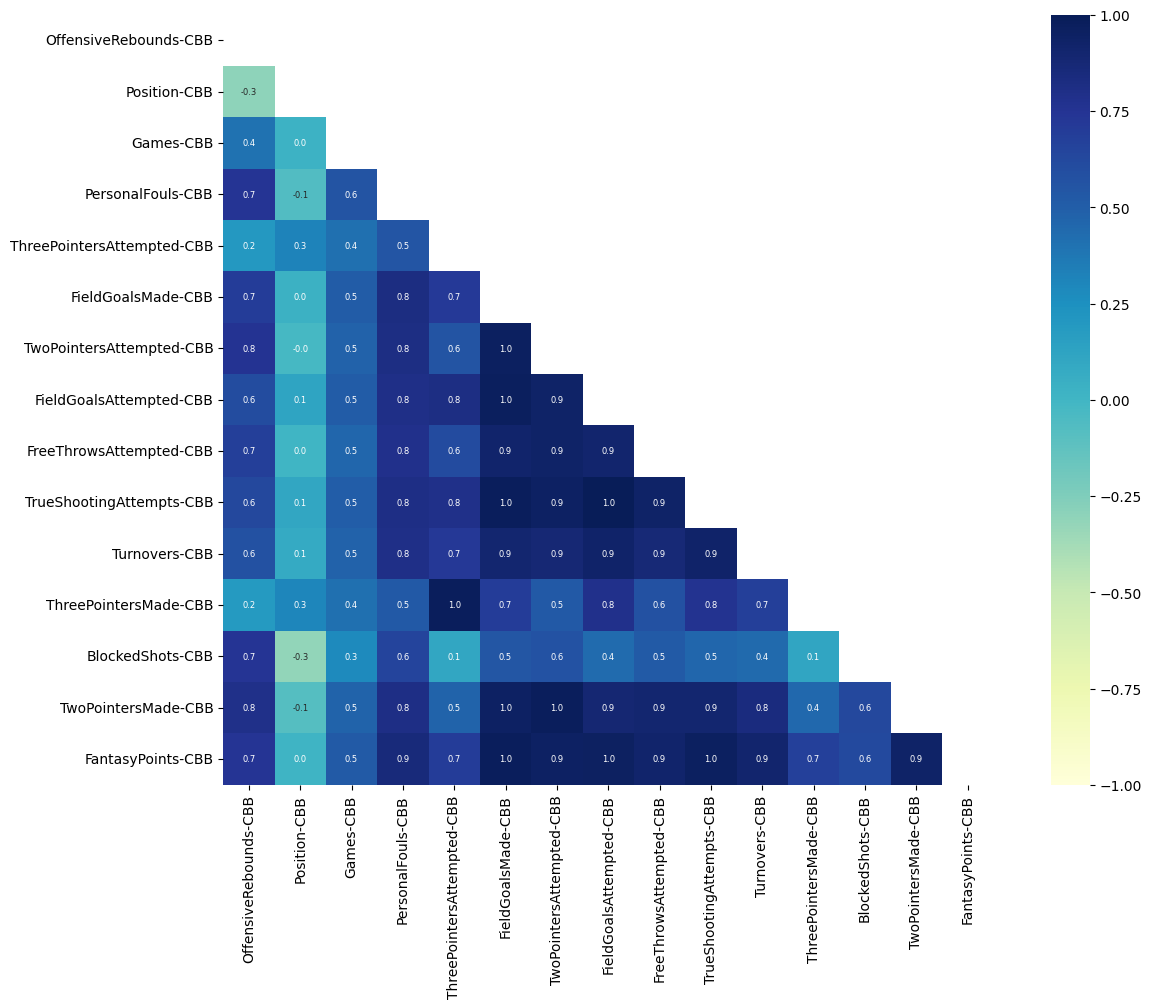

In [28]:
# Correlation Matrix
import seaborn as sns
mask = np.triu(np.ones_like(df[predictors_bkw].corr(), dtype = np.bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df[predictors_bkw].corr(), mask = mask, square = True, annot=True, fmt=".1f", vmin=-1, vmax=1, cmap='YlGnBu', annot_kws={"size": 6})
plt.xticks(rotation=90)
plt.show()

From the above heatmap, we can recognize that there are a lot of features that are high correlated to each other (0.9 and 1). It can be said that this model has strong multicollinearity. Therefore, it may lead to low accuracy when we handle a larger dataset and this model may not be effective for prediction.

#### 4.1 c) Perform ML Regularization techniques on Linear model

In [29]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)   # instantiate
ridge.fit(X1_std_train, y_train)            # fit to training data
ridge.coef_
y_test_fit_ridge = ridge.predict(X1_std_test)
mse_test_ridge = np.mean((y_test - y_test_fit_ridge)**2)
print('MSE Ridge Test: ', mse_test_ridge)

MSE Ridge Test:  112.69538127687875


In [30]:
# LASSO
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X1_std_train, y_train)
y_test_fit_lasso = lasso.predict(X1_std_test)
mse_test_lasso = np.mean( (y_test - y_test_fit_lasso)**2)
print('MSE Lasso Test: ', mse_test_lasso)

MSE Lasso Test:  112.5720466349442


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+04, tolerance: 3.297e+00



In [31]:
# ElasticNet
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(l1_ratio=0.9)
elnet.fit(X1_std_train, y_train)
y_test_fit_elnet = elnet.predict(X1_std_test)
mse_test_elnet = np.mean( (y_test - y_test_fit_elnet)**2)
print('MSE ElasticNet Test: ', mse_test_elnet)

MSE ElasticNet Test:  103.53440101012727


## 4.2 K-NN

In [32]:
#import packages
from sklearn.neighbors import KNeighborsRegressor

In [33]:
#tuning k
#step 1: set largest k to be n where n=number of rows in training set
X_test.shape

(134, 31)

In [34]:
#tuning k step 2 with GridSearchCV
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
k_range = list(range(1, X_test.shape[0]))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 5 folds for each of 133 candidates, totalling 665 fits


In [35]:
#get tuned k
print(grid_search.best_params_)


{'n_neighbors': 55}


In [36]:
#fit regressor with tuned k value
knn = KNeighborsRegressor(n_neighbors=55) #see above cell

knn.fit(X_train, y_train)

y_train_hat=knn.predict(X_train)

mse_train = mean_squared_error(y_train_hat, y_train)
mse_train

92.77613572301823

In [37]:
#predict on test set and get mse
y_test_hat = knn.predict(X_test)

mse_test = mean_squared_error(y_test_hat, y_test)
mse_test

114.34328405082027

## 4.3 Decision Tree

We found out that the categorical variables worsen the performance of our tree-based models. So, we decided to drop the Positions feature from the dataset.

In [38]:
X_train = X_train.drop(['Position-CBB'], axis=1)
X_test = X_test.drop(['Position-CBB'], axis=1)

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import *

#### 4.3 a) Build "Full Tree"

In [40]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
y_dt_train = dt.predict(X_train)
y_dt_test = dt.predict(X_test)

In [42]:
mse_test = mean_squared_error(y_test, y_dt_test)
print("MSE test: ", mse_test)

MSE test:  200.12755597014925


In [43]:
print('Number of nodes', dt.tree_.node_count)

Number of nodes 633


In [44]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_4 <= 144.10
|   |--- feature_10 <= 0.50
|   |   |--- feature_1 <= 0.65
|   |   |   |--- feature_7 <= 15.15
|   |   |   |   |--- feature_4 <= 0.15
|   |   |   |   |   |--- feature_6 <= 3.50
|   |   |   |   |   |   |--- feature_0 <= 6.60
|   |   |   |   |   |   |   |--- feature_15 <= 2016.50
|   |   |   |   |   |   |   |   |--- value: [11.20]
|   |   |   |   |   |   |   |--- feature_15 >  2016.50
|   |   |   |   |   |   |   |   |--- value: [8.75]
|   |   |   |   |   |   |--- feature_0 >  6.60
|   |   |   |   |   |   |   |--- value: [16.80]
|   |   |   |   |   |--- feature_6 >  3.50
|   |   |   |   |   |   |--- value: [1.20]
|   |   |   |   |--- feature_4 >  0.15
|   |   |   |   |   |--- feature_1 <= 0.33
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- value: [-1.90]
|   |   |   |   |   |   |--- feature_12 >  0.50
|   |   |   |   |   |   |   |--- feature_7 <= 13.60
|   |   |   |   |   |   |   |   |--- feature_26 <= 1.00
|   |   |   |   |   |  

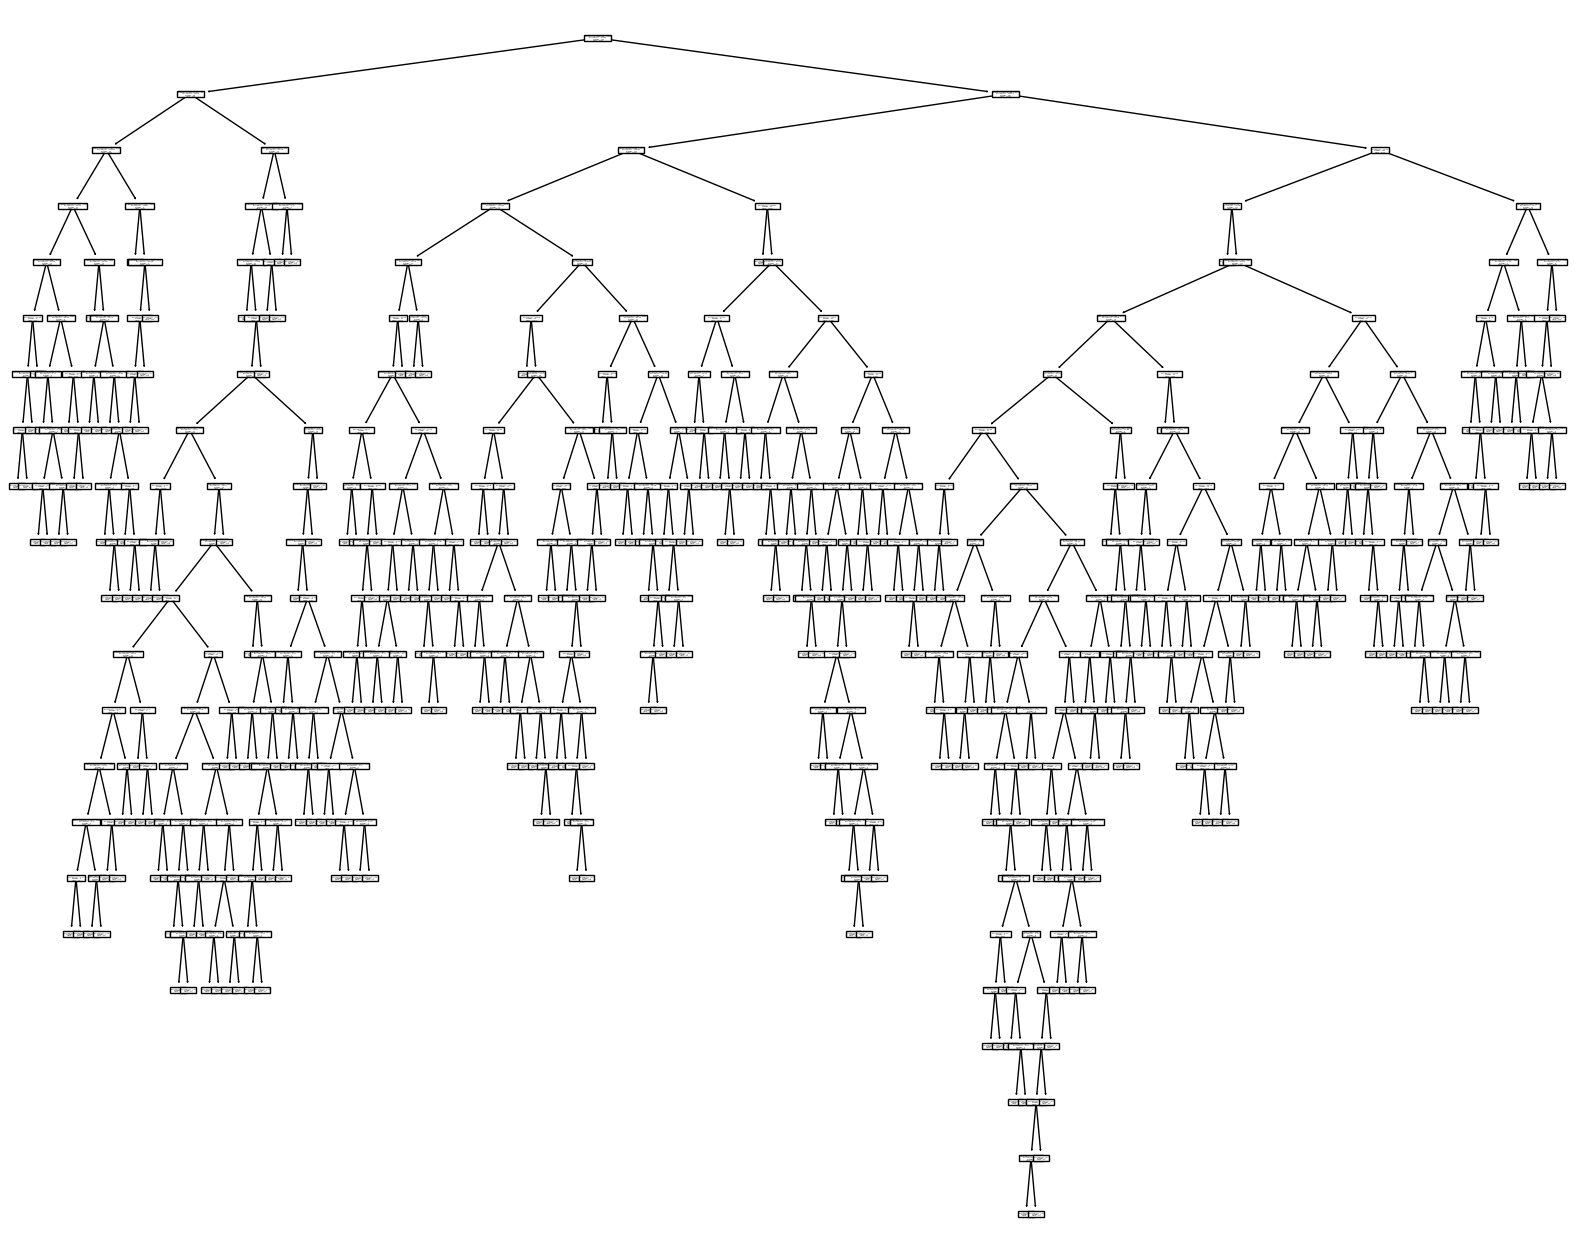

In [45]:
fig = plt.figure(figsize=(20,16))
tree.plot_tree(dt, feature_names=X_train.columns);

#### 4.3 b) Reduced Tree

In [46]:
dt_reduced = DecisionTreeRegressor(max_depth=5,
                                  min_samples_split = 40,
                                  min_samples_leaf = 100,
                                  min_impurity_decrease = 0.01)
dt_reduced.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_impurity_decrease=0.01,
                      min_samples_leaf=100, min_samples_split=40)

In [47]:
y_train_reducedDT = dt_reduced.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_reducedDT)
print('MSE Train: ', mse_train)

MSE Train:  90.50998947434778


In [48]:
y_test_reducedDT = dt_reduced.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_reducedDT)
print('MSE Test: ', mse_test)

MSE Test:  123.97292861369367


#### 4.3 c) Hyper Parameters Tuning
Grid Search 3-fold Cross Validation

In [49]:
# Hyper parameters range intialization for tuning

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [50]:
from sklearn.model_selection import GridSearchCV
tuning_model = GridSearchCV(dt, param_grid=parameters, scoring='neg_mean_squared_error', cv=3, verbose=3)

In [51]:
# def timer(start_time=None):
#     if not start_time:
#         start_time=datetime.now()
#         return start_time
#     elif start_time:
#         thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#         tmin,tsec=divmod(temp_sec,60)
#         #print(thour,":",tmin,':',round(tsec,2))

# from datetime import datetime

# start_time=timer(None)
# tuning_model.fit(X_train, y_train)
# timer(start_time)

In [52]:
# tuning_model.best_params_

We commented out since the tuning needs long time to fit all models.  
The best parameter after tuning is:   
>
             {'max_depth': 5,
              'max_features': 'auto',  
              'max_leaf_nodes': None,  
              'min_samples_leaf': 1,  
              'min_weight_fraction_leaf': 0.3,  
              'splitter': 'random'}.

In [53]:
tuned_hyper_model= DecisionTreeRegressor(max_depth = 5,
                                         max_features = 'auto',
                                         max_leaf_nodes = None,
                                         min_samples_leaf = 1,
                                         min_weight_fraction_leaf = 0.3,
                                         splitter = 'random')
tuned_hyper_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.



DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.3, splitter='random')

In [54]:
tuned_pred = tuned_hyper_model.predict(X_test)

In [55]:
# with tuning
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 8.412593037762596
MSE: 107.55167833496863
RMSE: 10.370712527833785


In [56]:
# without tuning
print('MAE:', metrics.mean_absolute_error(y_test, y_dt_test))
print('MSE:', metrics.mean_squared_error(y_test, y_dt_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_dt_test)))

MAE: 10.251119402985076
MSE: 200.12755597014925
RMSE: 14.146644689471396


## 4.4 Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

#### 4.4 a) Full Tree

In [58]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [59]:
y_rf_pred = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)
print(mse_rf)

111.71482726445892


#### 4.4 b) Reduced Tree

In [60]:
reduce_rf =  RandomForestRegressor(n_estimators = 300,
                                   max_features = 'sqrt',
                                   max_depth = 5,
                                   random_state = 18)
reduce_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [61]:
pred_reduced_rf = reduce_rf.predict(X_test)
mse_reducedRF = mean_squared_error(y_test, pred_reduced_rf)
rmse_reducedRF = mse_reducedRF**.5
print("MSE test: ", mse_reducedRF)
print("RMSE: ", rmse_reducedRF)

MSE test:  106.60184568911598
RMSE:  10.324816980901694


#### 4.4 c) Hyper Parameters Tuning
Grid Search 5-fold Cross Validation

In [62]:
# from datetime import datetime
# ## Define Grid
# grid = {
#     'n_estimators': [100,200,300,400,500],
#     'max_features': ['sqrt','log2'],
#     'max_depth' : [1,2,3,4,5,6,7,8,9,10],
#     'random_state' : [18]
# }
# ## show start time
# print(datetime.now())
# ## Grid Search function
# CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
# CV_rfr.fit(X_train, y_train)
# ## show end time
# print(datetime.now())

In [63]:
# CV_rfr.best_params_

We commented out since the tuning needs long time to fit all models.  
The best parameter after tuning is:   
>
             {'max_depth': 9,  
              'max_features': 'log2',  
              'n_estimators': 300,  
              'random_state': 18}

In [64]:
rf_tuning = RandomForestRegressor(n_estimators = 300,
                                  max_features = 'log2',
                                  max_depth = 9,
                                  random_state = 18)
rf_tuning.fit(X_train, y_train)

pred_tuning = rf_tuning.predict(X_test)
mse_tuning = mean_squared_error(y_test, pred_tuning)

print("MSE validation: ", mse_tuning)
print("RMSE: ", mse_tuning**.5)

MSE validation:  106.49244391038334
RMSE:  10.319517620043262


# 5. Ensemble Method: Boosting

## 5.1 XGBoost

In [65]:
import xgboost as xgb
from xgboost import XGBRegressor

#### 5.1 a) Basic Model

In [66]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = mse_xgb**.5
print("MSE Test: ", mse_xgb)
print("RMSE: ", rmse_xgb)

MSE Test:  128.98109382393304
RMSE:  11.356984363110351


#### 5.1 b) Hyper Parameters Tuning
Randomized Search 5-fold Cross Validation

In [67]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'n_estimators': [100, 500, 1000],
    'max_depth': range(3, 10, 2),
    'subsample': np.arange(0.5, 1, 0.1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Instantiate XGBoost regressor
xgb_tuning = XGBRegressor()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_tuning,
    param_distributions=param_grid,
    n_iter=50,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV object to data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[23:17:27] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': range(3, 10, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                   verbose=3)

In [68]:
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", abs(random_search.best_score_))

Best hyperparameters:  {'subsample': 0.7999999999999999, 'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}
Best mean squared error:  94.4042349019479


## 5.2 Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

#### 5.2 a) Basic Model

In [70]:
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
pred_gbm = gbm.predict(X_test)
mse_gbm = mean_squared_error(y_test, pred_gbm)
rmse_gbm = mse_gbm**.5
print("MSE test: ", mse_gbm)
print("RMSE: ", rmse_gbm)

MSE test:  140.97453853625564
RMSE:  11.87326991760297


#### 5.2 b) Reduced Model

In [71]:
gbm_reduced = GradientBoostingRegressor(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=1 )
gbm_reduced.fit(X_train, y_train)
pred_gbm_reduced = gbm_reduced.predict(X_test)
mse_gbm_reduced = mean_squared_error(y_test, pred_gbm_reduced)
rmse_gbm_reduced = mse_gbm_reduced**.5
print("MSE Test: ", mse_gbm_reduced)
print("RMSE: ", rmse_gbm_reduced)

MSE Test:  107.76476955024071
RMSE:  10.38098114583784


#### 5.2 c) Hyper Parameters Tuning
Randomized Search 5-fold Cross Validation

In [72]:
param_grid = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'n_estimators': [100, 500, 1000],
    'max_depth': range(3, 10, 2),
    'subsample': np.arange(0.5, 1, 0.1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Instantiate Gradient Boosting regressor
gbm = GradientBoostingRegressor()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    gbm,
    param_distributions=param_grid,
    n_iter=50,
    scoring=make_scorer(mean_squared_error, greater_is_better=False),
    cv=5,
    verbose=3,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV object to data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
                                        'max_depth': range(3, 10, 2),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=42,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                   verbose=3)

In [73]:
print("Best hyperparameters: ", random_search.best_params_)
print("Best mean squared error: ", abs(random_search.best_score_))

Best hyperparameters:  {'subsample': 0.8999999999999999, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.01}
Best mean squared error:  96.00920722949677


# 6. Summarization

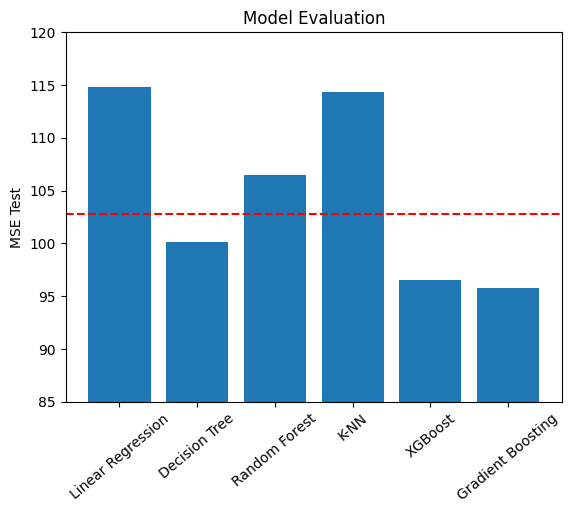

In [74]:
x_axis = ['Linear Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'XGBoost', 'Gradient Boosting']
y_axis = [114.83, 100.15, 106.49, 114.34, 96.52, 95.78]

plt.ylim(85, 120)
plt.xticks(rotation=40)
plt.bar(x_axis, y_axis)
plt.axhline(y = 102.76, color = 'r', linestyle = '--')

plt.title('Model Evaluation')
#plt.xlabel('Methods')
plt.ylabel('MSE Test')
plt.savefig("ModelEval.png")
plt.show()

# 7. Prediction on specific players

In [75]:
players = pd.read_csv("/content/drive/Shareddrives/BA476 Team 4/SpecificPlayers.csv")
players

,Name,EffectiveFieldGoalsPercentage-CBB,FreeThrowsPercentage-CBB,OffensiveRebounds-CBB,ThreePointersPercentage-CBB,FantasyPointsFanDuel-CBB,Assists-CBB,Games-CBB,TrueShootingPercentage-CBB,PersonalFouls-CBB,...,Turnovers-CBB,ThreePointersMade-CBB,BlockedShots-CBB,TwoPointersPercentage-CBB,FieldGoalsPercentage-CBB,FreeThrowsMade-CBB,TwoPointersMade-CBB,FantasyPoints-CBB,Minutes-CBB,PlayerEfficiencyRating-NBA
0,Greg Oden,61.6,0.628,113,0,280.2,21,32,62.6,87,...,2,0,105,0.616,0.616,123,189,340.4,240,18.1
1,Zach Edey,60.7,0.734,186,0,250.2,52,34,63.9,56,...,77,0,72,0.607,0.607,177,290,334.3,504,N/A HE JUST GRADUATED


In [76]:
y_true = players.iloc[:, -1]
X_player = players.iloc[:, 1: -1]

In [77]:
y_true

0                     18.1
1    N/A HE JUST GRADUATED
Name: PlayerEfficiencyRating-NBA, dtype: object

In [78]:
best_model = GradientBoostingRegressor(subsample = 0.7,
                                     n_estimators = 100,
                                     min_samples_split = 9,
                                     min_samples_leaf = 3,
                                     max_features = 'log2',
                                     max_depth = 5,
                                     learning_rate = 0.01)
best_model.fit(X_train, y_train)
pred_best = best_model.predict(X_player)

print("Prediction on 2 players' performation: ", pred_best)


Prediction on 2 players' performation:  [11.53046762 12.58228617]
